# Clustering Lab: Hierarchical and DBSCAN

**Student:** [Your Name]  
**Course:** MSCS-634

## 1. Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from scipy.cluster.hierarchy import dendrogram, linkage

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

Libraries imported successfully!


In [ ]:
wine = load_wine()
X = wine.data
y_true = wine.target
feature_names = wine.feature_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y_true

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")

Dataset loaded: 178 samples, 13 features

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target classes: [0 1 2]


In [ ]:
df.head()

First 5 rows of the dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null 

In [ ]:
df.describe()

Statistical Summary:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features standardized")

Features standardized successfully!

Mean of scaled features: [ 0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  0. -0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 2. Hierarchical Clustering

In [ ]:
n_clusters_list = [2, 3, 4, 5]
hierarchical_results = {}

for n in n_clusters_list:
    agg_clust = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_clust.fit_predict(X_scaled)
    
    hierarchical_results[n] = {
        'labels': labels,
        'silhouette': silhouette_score(X_scaled, labels),
        'homogeneity': homogeneity_score(y_true, labels),
        'completeness': completeness_score(y_true, labels)
    }
    
    print(f"n_clusters={n}: Silhouette={hierarchical_results[n]['silhouette']:.4f}")


n_clusters=2:
  Silhouette Score: 0.2670
  Homogeneity Score: 0.4441
  Completeness Score: 0.7745

n_clusters=3:
  Silhouette Score: 0.2774
  Homogeneity Score: 0.7904
  Completeness Score: 0.7825

n_clusters=4:
  Silhouette Score: 0.2258
  Homogeneity Score: 0.7904
  Completeness Score: 0.6490

n_clusters=5:
  Silhouette Score: 0.1867
  Homogeneity Score: 0.8106
  Completeness Score: 0.5762


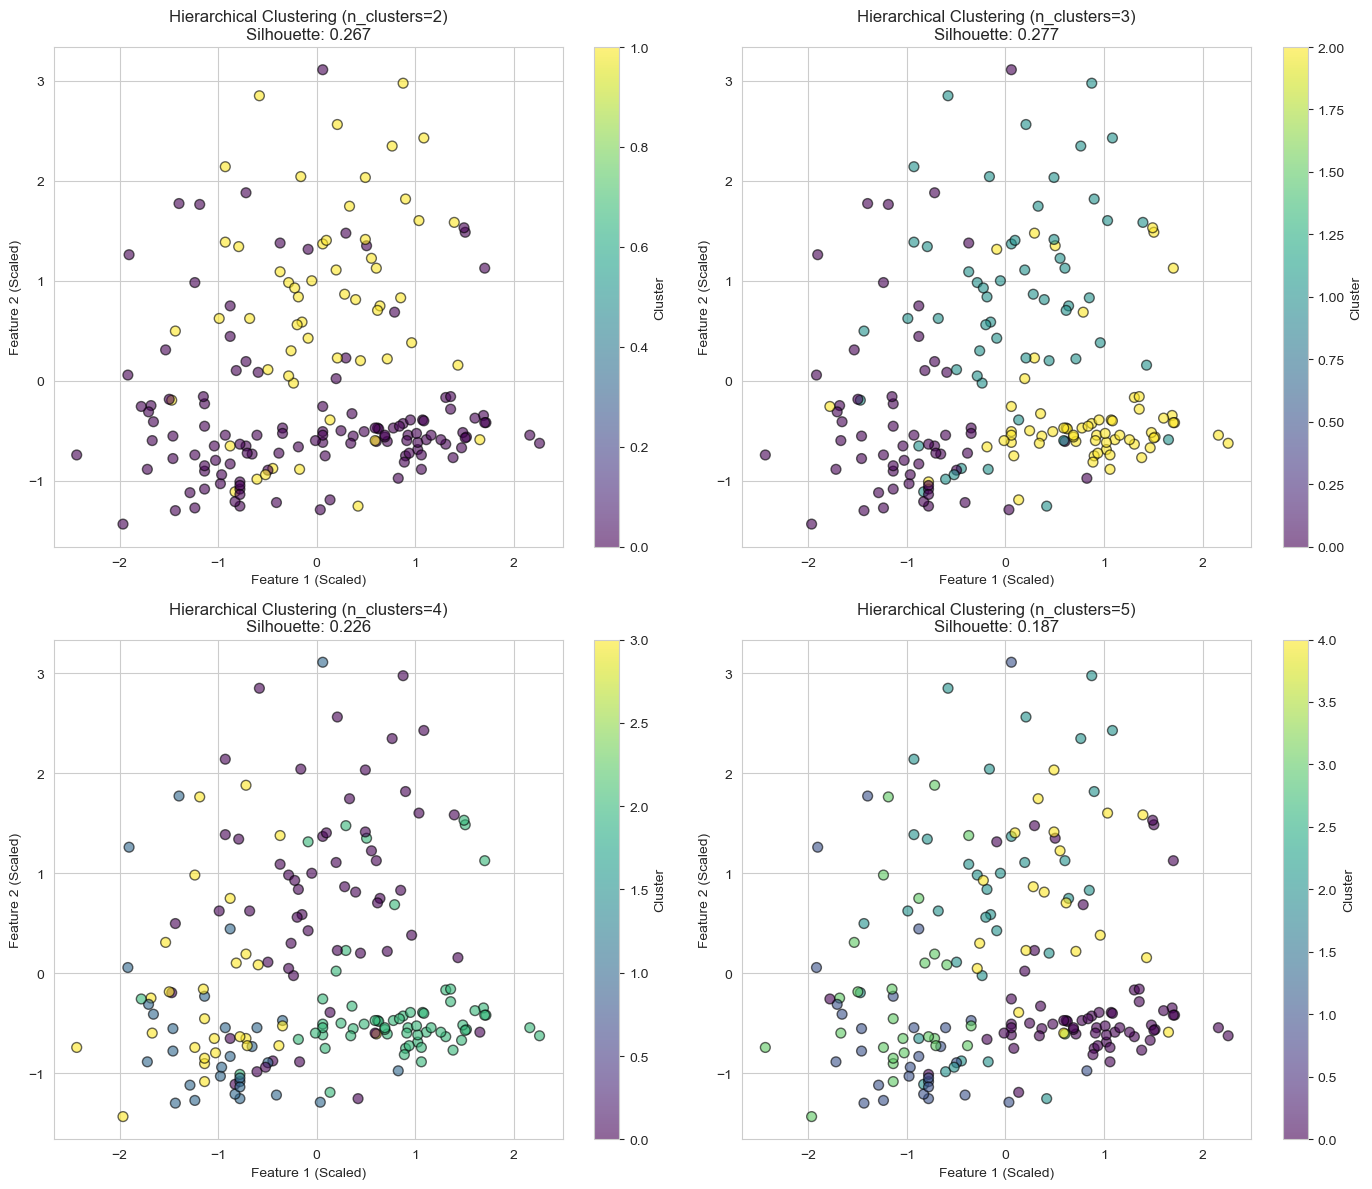

Hierarchical clustering visualizations saved!


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, n in enumerate(n_clusters_list):
    labels = hierarchical_results[n]['labels']
    scatter = axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', 
                                s=50, alpha=0.6, edgecolors='black')
    axes[idx].set_title(f'n_clusters={n}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    plt.colorbar(scatter, ax=axes[idx])

plt.tight_layout()
plt.savefig('../screenshots/hierarchical_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

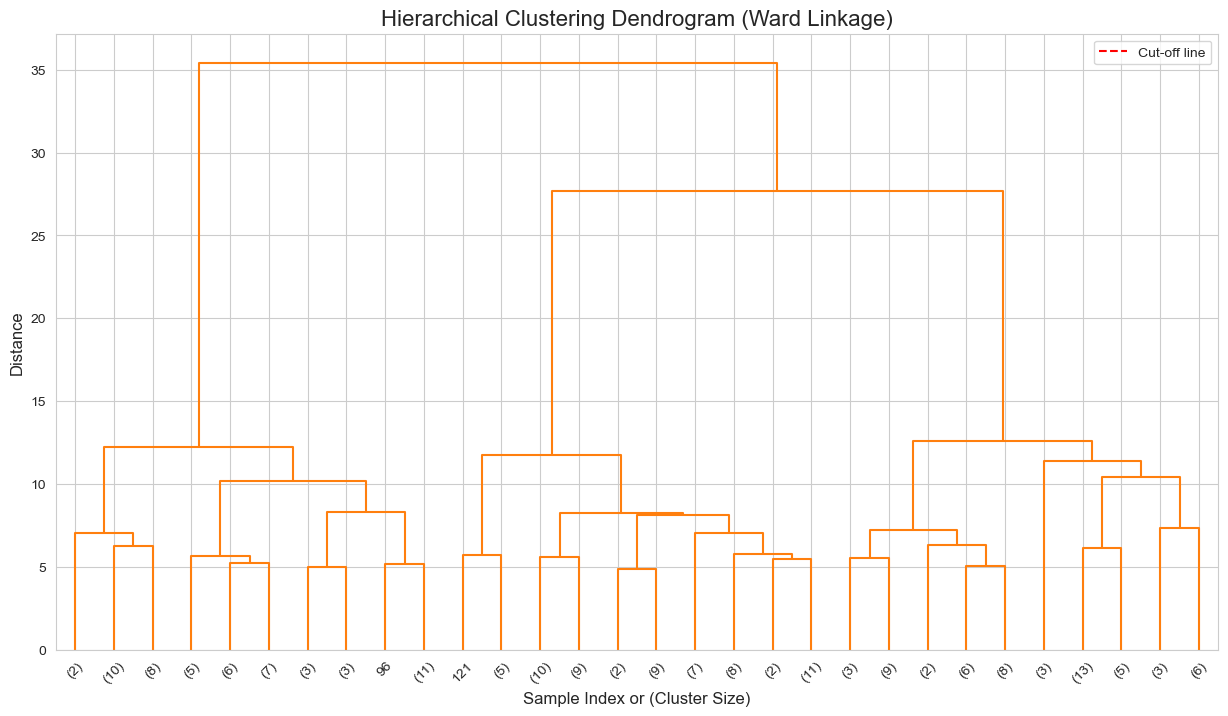

Dendrogram saved!


In [ ]:
plt.figure(figsize=(15, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, p=30, truncate_mode='lastp', color_threshold=50)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.savefig('../screenshots/dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. DBSCAN Clustering

In [ ]:
eps_values = [2.0, 3.0, 4.0]
min_samples_values = [3, 5]
dbscan_results = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        key = f"eps={eps}, min_samples={min_samples}"
        
        if n_clusters >= 2:
            mask = labels != -1
            sil_score = silhouette_score(X_scaled[mask], labels[mask]) if mask.sum() > 0 else 0.0
            homo_score = homogeneity_score(y_true[mask], labels[mask]) if mask.sum() > 0 else 0.0
            comp_score = completeness_score(y_true[mask], labels[mask]) if mask.sum() > 0 else 0.0
        else:
            sil_score = homo_score = comp_score = 0.0
        
        dbscan_results[key] = {
            'labels': labels, 'n_clusters': n_clusters, 'n_noise': n_noise,
            'silhouette': sil_score, 'homogeneity': homo_score, 'completeness': comp_score
        }
        
        print(f"{key}: Clusters={n_clusters}, Noise={n_noise}, Silhouette={sil_score:.4f}")


eps=2.0, min_samples=3:
  Clusters found: 5
  Noise points: 64
  Silhouette Score: 0.2113
  Homogeneity Score: 0.5801
  Completeness Score: 0.6273

eps=2.0, min_samples=5:
  Clusters found: 5
  Noise points: 85
  Silhouette Score: 0.2405
  Homogeneity Score: 0.5858
  Completeness Score: 0.6056

eps=3.0, min_samples=3:
  Clusters found: 2
  Noise points: 7
  Silhouette Score: 0.2392
  Homogeneity Score: 0.0156
  Completeness Score: 0.1919

eps=3.0, min_samples=5:
  Clusters found: 1
  Noise points: 11
  Silhouette Score: 0.0000
  Homogeneity Score: 0.0000
  Completeness Score: 0.0000

eps=4.0, min_samples=3:
  Clusters found: 2
  Noise points: 0
  Silhouette Score: 0.2225
  Homogeneity Score: 0.0145
  Completeness Score: 0.1837

eps=4.0, min_samples=5:
  Clusters found: 1
  Noise points: 3
  Silhouette Score: 0.0000
  Homogeneity Score: 0.0000
  Completeness Score: 0.0000


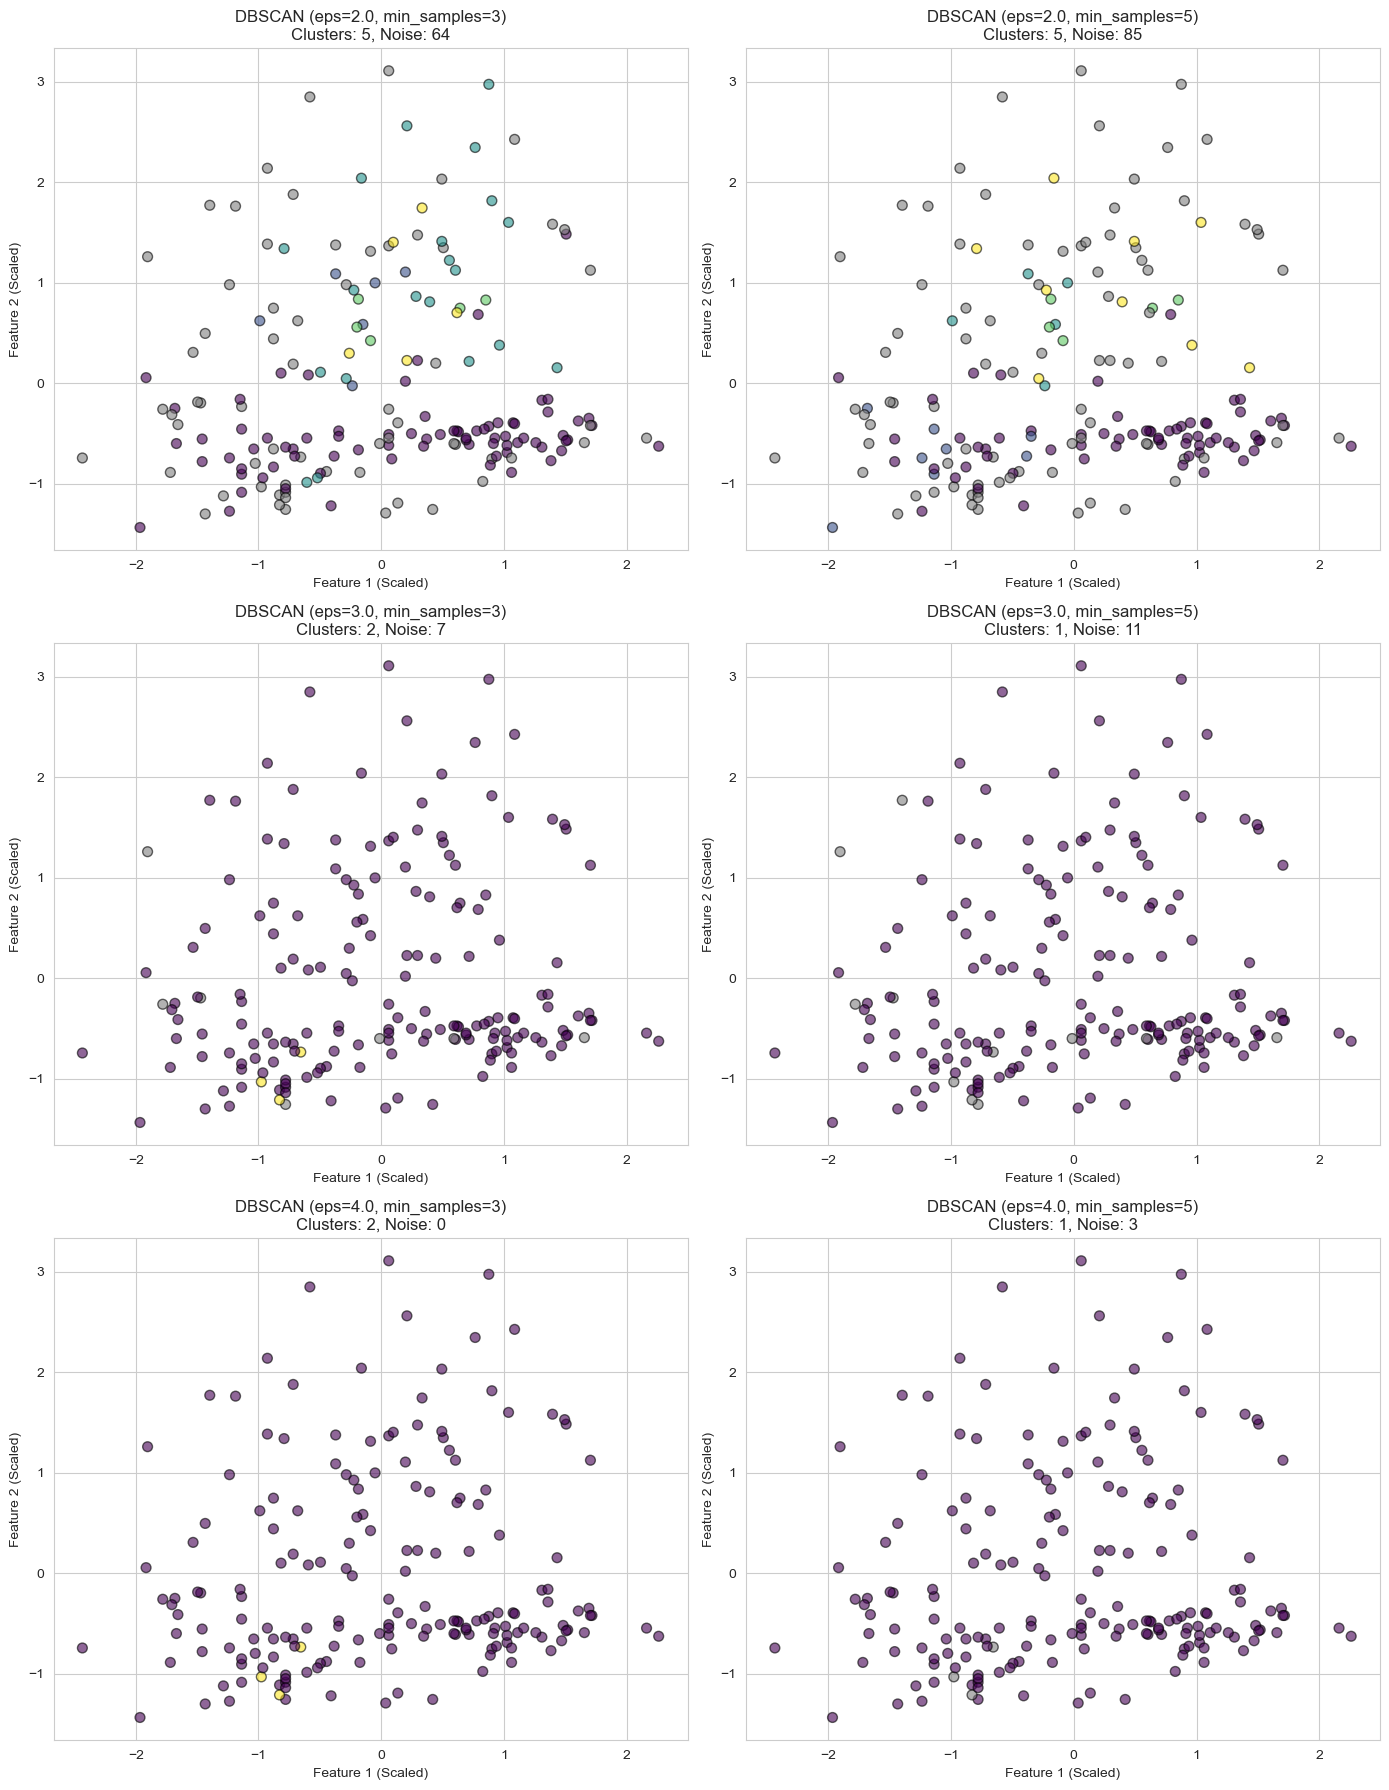

DBSCAN clustering visualizations saved!


In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
axes = axes.ravel()

idx = 0
for eps in eps_values:
    for min_samples in min_samples_values:
        key = f"eps={eps}, min_samples={min_samples}"
        labels = dbscan_results[key]['labels']
        
        max_label = max(labels) if len(labels) > 0 and max(labels) > 0 else 1
        colors = ['gray' if label == -1 else plt.cm.viridis(label / max_label) for label in labels]
        
        axes[idx].scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors, s=50, alpha=0.6, edgecolors='black')
        axes[idx].set_title(f'{key}\nClusters={dbscan_results[key]["n_clusters"]}, Noise={dbscan_results[key]["n_noise"]}')
        axes[idx].set_xlabel('Feature 1')
        axes[idx].set_ylabel('Feature 2')
        idx += 1

plt.tight_layout()
plt.savefig('../screenshots/dbscan_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Comparison & Metrics

In [ ]:
comparison_data = []

for n in n_clusters_list:
    comparison_data.append({
        'Algorithm': 'Hierarchical', 'Parameters': f'n_clusters={n}',
        'Clusters': n, 'Noise Points': 0,
        'Silhouette': hierarchical_results[n]['silhouette'],
        'Homogeneity': hierarchical_results[n]['homogeneity'],
        'Completeness': hierarchical_results[n]['completeness']
    })

for key, results in dbscan_results.items():
    comparison_data.append({
        'Algorithm': 'DBSCAN', 'Parameters': key,
        'Clusters': results['n_clusters'], 'Noise Points': results['n_noise'],
        'Silhouette': results['silhouette'],
        'Homogeneity': results['homogeneity'],
        'Completeness': results['completeness']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df


Clustering Comparison Table:


,Algorithm,Parameters,Clusters,Noise Points,Silhouette,Homogeneity,Completeness
0,Hierarchical,n_clusters=2,2,0,0.267013,0.444094,0.774489
1,Hierarchical,n_clusters=3,3,0,0.277444,0.790429,0.782541
2,Hierarchical,n_clusters=4,4,0,0.225837,0.790429,0.649028
3,Hierarchical,n_clusters=5,5,0,0.186742,0.810589,0.576247
4,DBSCAN,"eps=2.0, min_samples=3",5,64,0.211348,0.580053,0.627266
5,DBSCAN,"eps=2.0, min_samples=5",5,85,0.240461,0.585793,0.605634
6,DBSCAN,"eps=3.0, min_samples=3",2,7,0.239187,0.015584,0.191939
7,DBSCAN,"eps=3.0, min_samples=5",1,11,0.000000,0.000000,0.000000
8,DBSCAN,"eps=4.0, min_samples=3",2,0,0.222451,0.014464,0.183668
9,DBSCAN,"eps=4.0, min_samples=5",1,3,0.000000,0.000000,0.000000


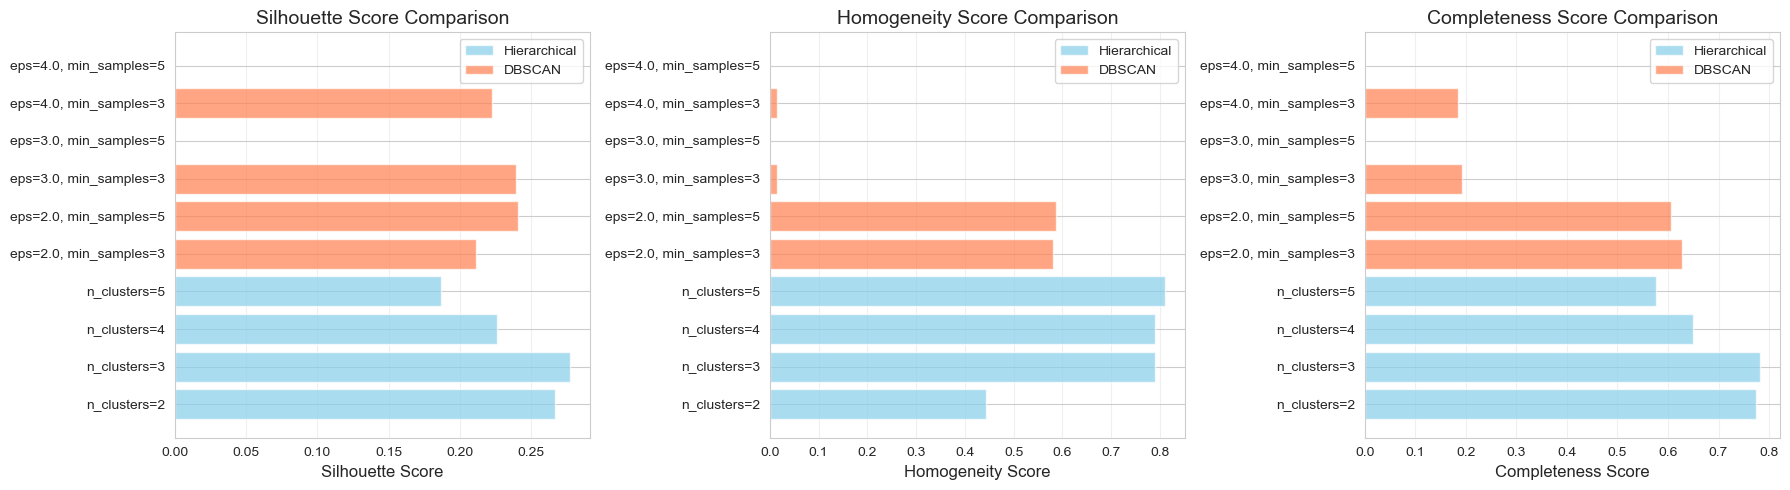

Metrics comparison visualization saved!


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['Silhouette', 'Homogeneity', 'Completeness']
colors = {'Hierarchical': 'skyblue', 'DBSCAN': 'coral'}

for idx, metric in enumerate(metrics):
    for algo in ['Hierarchical', 'DBSCAN']:
        data = comparison_df[comparison_df['Algorithm'] == algo]
        axes[idx].barh(data['Parameters'], data[metric], label=algo, color=colors[algo], alpha=0.7)
    axes[idx].set_xlabel(f'{metric} Score')
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].legend()
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../screenshots/metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
best_hier = max(hierarchical_results.items(), key=lambda x: x[1]['silhouette'])
print(f"Best Hierarchical: n_clusters={best_hier[0]}, Silhouette={best_hier[1]['silhouette']:.4f}")

valid_dbscan = {k: v for k, v in dbscan_results.items() if v['n_clusters'] >= 2}
if valid_dbscan:
    best_dbscan = max(valid_dbscan.items(), key=lambda x: x[1]['silhouette'])
    print(f"Best DBSCAN: {best_dbscan[0]}, Silhouette={best_dbscan[1]['silhouette']:.4f}")

Best Hierarchical: n_clusters=3, Silhouette=0.2774
Best DBSCAN: eps=2.0, min_samples=5, Silhouette=0.2405
